In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
loans_2007=pd.read_csv(r"loan.csv")

C:\Users\vaibhav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
half_count = len(loans_2007) / 2
loans_2007 = loans_2007.dropna(thresh=half_count,axis=1) # Drop any column with more than 90% missing values

In [4]:
loans_2007.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>",other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [5]:
data_dictionary = pd.read_csv('LCDataDictionary.csv') # Loading in the data dictionary

In [6]:
data_dictionary.head()
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})

In [7]:
loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes,columns=['dtypes'])
loans_2007_dtypes = loans_2007_dtypes.reset_index()
loans_2007_dtypes['name'] = loans_2007_dtypes['index']
loans_2007_dtypes = loans_2007_dtypes[['name','dtypes']]
loans_2007_dtypes['first value'] = loans_2007.loc[0].values
preview = loans_2007_dtypes.merge(data_dictionary, on='name',how='left')

In [8]:
preview.head()

,name,dtypes,first value,description
0,id,int64,1077501,A unique LC assigned ID for the loan listing.
1,member_id,int64,1296599,A unique LC assigned Id for the borrower member.
2,loan_amnt,int64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,int64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.


In [9]:
preview.isnull().sum()

name           0
dtypes         0
first value    1
description    0
dtype: int64

In [10]:
drop_list = ["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"]

In [11]:
loans_2007 = loans_2007.drop(drop_list,axis=1)

In [12]:
preview[19:38]

,name,dtypes,first value,description
19,desc,object,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,Loan description provided by the borrower
20,purpose,object,credit_card,A category provided by the borrower for the loan request.
21,title,object,Computer,The loan title provided by the borrower
22,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
23,addr_state,object,AZ,The state provided by the borrower in the loan application
24,dti,float64,27.65,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
25,delinq_2yrs,int64,0,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
26,earliest_cr_line,object,Jan-85,The month the borrower's earliest reported credit line was opened
27,inq_last_6mths,int64,1,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
28,open_acc,int64,3,The number of open credit lines in the borrower's credit file.


In [13]:
drop_cols = [ 'title', 'url', 'zip_code', 'addr_state']
loans_2007 = loans_2007.drop(drop_cols, axis=1)

In [14]:
preview[38:]

,name,dtypes,first value,description
38,total_rec_prncp,float64,5000,Principal received to date
39,total_rec_int,float64,863.16,Interest received to date
40,total_rec_late_fee,float64,0,Late fees received to date
41,recoveries,float64,0,post charge off gross recovery
42,collection_recovery_fee,float64,0,post charge off collection fee
43,last_pymnt_d,object,Jan-15,Last month payment was received
44,last_pymnt_amnt,float64,171.62,Last total payment amount received
45,last_credit_pull_d,object,May-16,The most recent month LC pulled credit for this loan
46,collections_12_mths_ex_med,float64,0,Number of collections in 12 months excluding medical collections
47,policy_code,int64,1,publicly available policy_code=1\nnew products not publicly available policy_code=2


In [15]:
loans_2007["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [16]:
loans_2007.drop(loans_2007[loans_2007['loan_status']=="Current"].index, inplace = True) 

In [17]:
loans_2007.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,20.00,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,NaN,wedding,11.20,f,0.0,1,0,0.0,0,0.0,0.0


In [18]:
loans_2007['loan_status'] = loans_2007['loan_status'].replace(['Fully Paid','Charged Off'],[0,1])

In [19]:
loans_2007.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,0,n,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,n,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,0,n,NaN,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,0,n,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,20.00,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,0,n,NaN,wedding,11.20,f,0.0,1,0,0.0,0,0.0,0.0


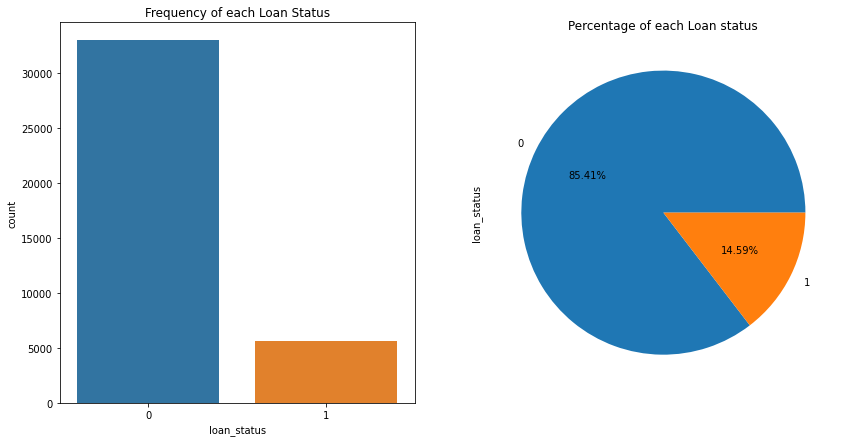

In [20]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loans_2007,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans_2007.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

In [21]:
loans_2007['int_rate'] = list(map(lambda x: x[:-1], loans_2007['int_rate'].values))

In [22]:
loans_2007['int_rate'] = [float(x) for x in loans_2007['int_rate'].values]

In [23]:
loans_2007.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,0,n,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,n,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,0,n,NaN,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,0,n,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,20.00,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,0,n,NaN,wedding,11.20,f,0.0,1,0,0.0,0,0.0,0.0


## Question 1

In [24]:
data=pd.read_csv(r"loan_data_prepared.csv")

In [25]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,dti,mths_since_last_delinq,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,0,n,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,27.65,NaN,f,0.0,1,0,0.0,0,0.0,0.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,n,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,1.00,NaN,f,0.0,1,0,0.0,0,0.0,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,0,n,NaN,small_business,8.72,NaN,f,0.0,1,0,0.0,0,0.0,0.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,0,n,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,20.00,35.0,f,0.0,1,0,0.0,0,0.0,0.0
4,5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,0,n,NaN,wedding,11.20,NaN,f,0.0,1,0,0.0,0,0.0,0.0


<AxesSubplot:xlabel='grade', ylabel='loan_status'>

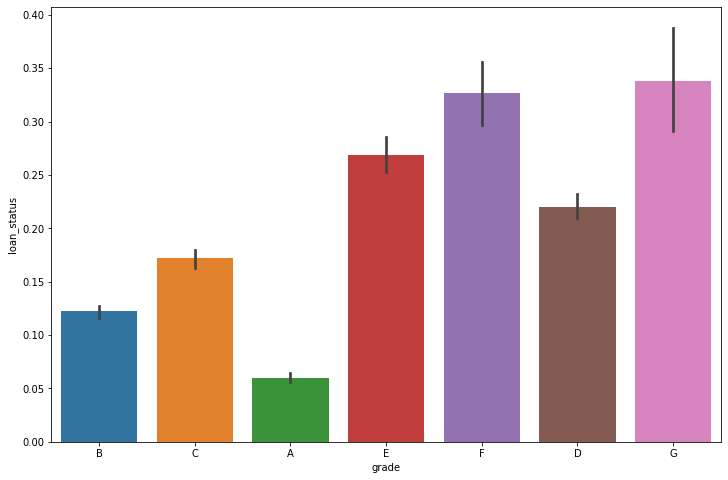

In [26]:
sns.barplot(x="grade",y="loan_status",data=data)

<AxesSubplot:xlabel='term', ylabel='loan_status'>

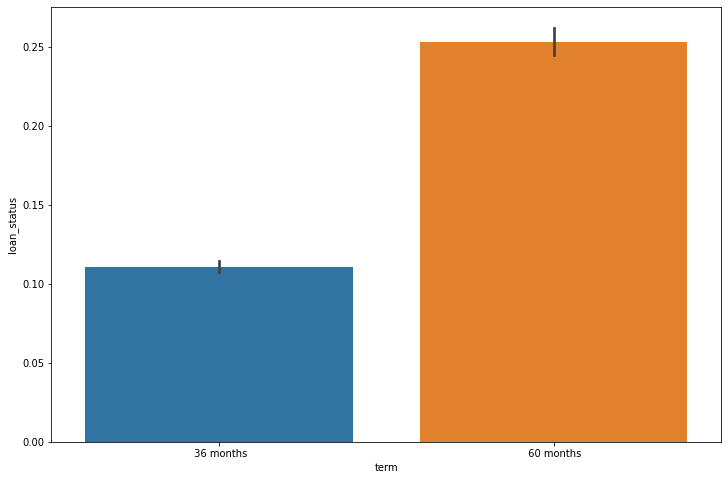

In [27]:
sns.barplot(x="term",y="loan_status",data=data)

<AxesSubplot:xlabel='sub_grade', ylabel='loan_status'>

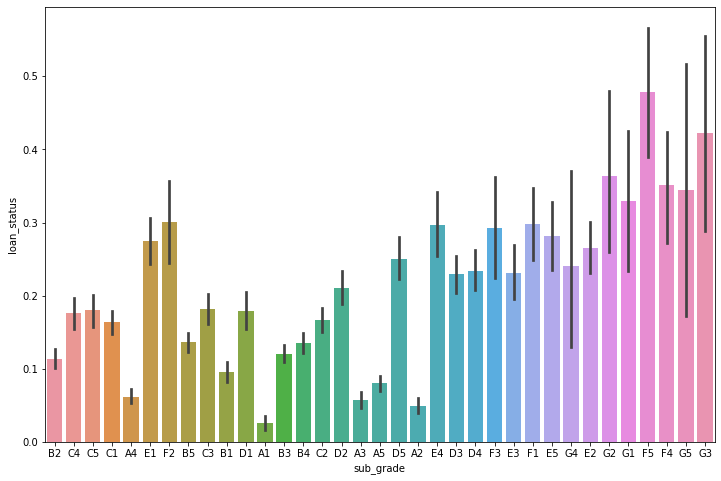

In [28]:
sns.barplot(x="sub_grade",y="loan_status",data=data)

<AxesSubplot:xlabel='purpose', ylabel='loan_status'>

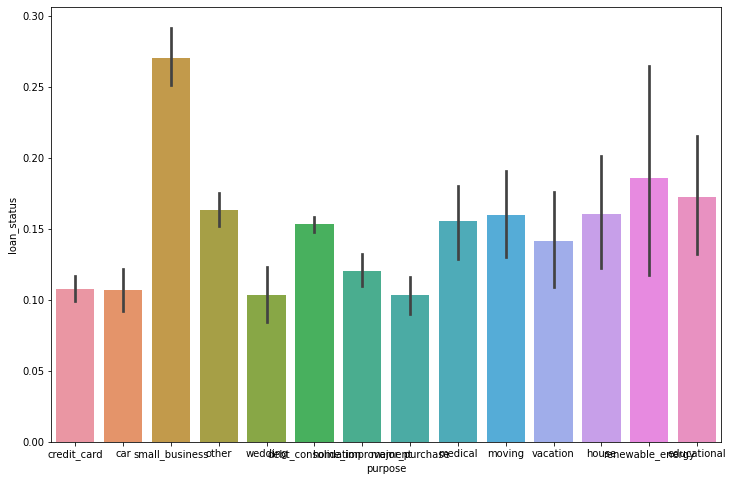

In [29]:
sns.barplot(x="purpose",y="loan_status",data=data)

# Question 2

In [30]:
data=pd.read_csv(r"loan_data_prepared.csv")

In [31]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,dti,mths_since_last_delinq,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,0,n,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,27.65,NaN,f,0.0,1,0,0.0,0,0.0,0.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,n,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,1.00,NaN,f,0.0,1,0,0.0,0,0.0,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,0,n,NaN,small_business,8.72,NaN,f,0.0,1,0,0.0,0,0.0,0.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,0,n,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,20.00,35.0,f,0.0,1,0,0.0,0,0.0,0.0
4,5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,0,n,NaN,wedding,11.20,NaN,f,0.0,1,0,0.0,0,0.0,0.0


In [32]:
new = []
for each_element in data.loan_amnt:
    if each_element <=5000:
        new.append('Low')
    elif each_element >5000 & each_element <=15000:
        new.append('Medium')
    elif each_element >15000 & each_element <=25000:
        new.append('High')
    else:
        new.append('Very High')

In [33]:
data['loan_amnt']=new

In [34]:
data.head(20)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,dti,mths_since_last_delinq,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0,1077501,1296599,Low,5000,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,0,n,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,27.65,NaN,f,0.0,1,0,0.0,0,0.0,0.0
1,1,1077430,1314167,Low,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,1,n,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,1.00,NaN,f,0.0,1,0,0.0,0,0.0,0.0
2,2,1077175,1313524,Low,2400,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,0,n,NaN,small_business,8.72,NaN,f,0.0,1,0,0.0,0,0.0,0.0
3,3,1076863,1277178,Medium,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,0,n,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,20.00,35.0,f,0.0,1,0,0.0,0,0.0,0.0
4,5,1075269,1311441,Low,5000,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,0,n,NaN,wedding,11.20,NaN,f,0.0,1,0,0.0,0,0.0,0.0
5,6,1069639,1304742,Medium,7000,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,0,n,"Borrower added on 12/18/11 > I am planning on using the funds to pay off two retail credit cards with 24.99% interest rates, as well as a major bank credit card with a 18.99% rate. I pay all my bills on time, looking for a lower combined payment and lower monthly payment.<br>",debt_consolidation,23.51,NaN,f,0.0,1,0,0.0,0,0.0,0.0
6,7,1072053,1288686,Low,3000,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,0,n,Borrower added on 12/16/11 > Downpayment for a car.<br>,car,5.35,NaN,f,0.0,1,0,0.0,0,0.0,0.0
7,8,1071795,1306957,Medium,5600,5600.00000,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-11,1,n,Borrower added on 12/21/11 > I own a small home-based judgment collection business. I have 5 years experience collecting debts. I am now going from a home office to a small office. I also plan to buy a small debt portfolio (eg. $10K for $1M of debt) <br>My score is not A+ because I own my home and have no mortgage.<br>,small_business,5.55,NaN,f,0.0,1,0,0.0,0,0.0,0.0
8,9,1071570,1306721,Medium,5375,5350.00000,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-11,1,n,"Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother and have no car payment or credit cards. I am in community college and work full time. Im going to use the money to make some repairs around the house and get some maintenance done on my car.<br><br> Borrower added on 12/20/11 > $1000 down only $4375 to go. Thanks to everyone that invested so far, looking forward to surprising my brother with the fixes around the house.<br>",other,18.08,NaN,f,0.0,1,0,0.0,0,0.0,0.0
9,10,1070078,1305201,Medium,6500,6500.00000,60 months,14.65%,153.45,C,

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

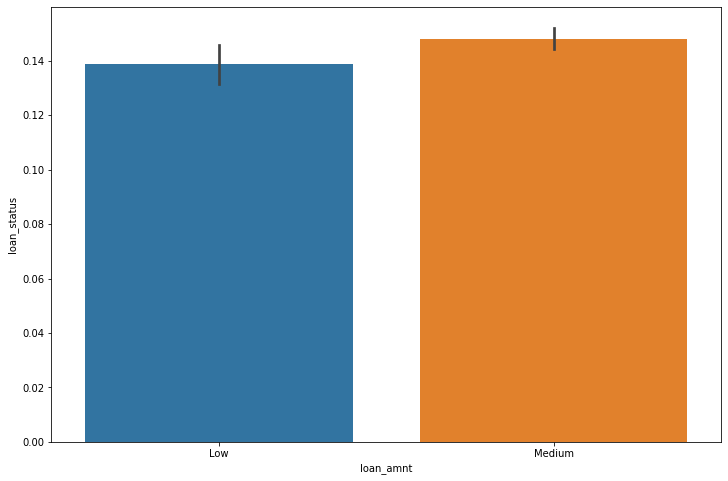

In [35]:
sns.barplot(x="loan_amnt",y="loan_status",data=data)

In [36]:
new = []
for each_element in data.annual_inc:
    if each_element <=50000:
        new.append('Low')
    elif each_element > 50000  and  each_element <=100000:
        new.append('Medium')
    elif each_element >100000 and  each_element <=150000:
        new.append('High')
    else:
        new.append('Very High')

In [37]:
data['annual_inc']=new

In [38]:
data.head(20)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,dti,mths_since_last_delinq,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0,1077501,1296599,Low,5000,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,Low,Verified,Dec-11,0,n,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,27.65,NaN,f,0.0,1,0,0.0,0,0.0,0.0
1,1,1077430,1314167,Low,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,Low,Source Verified,Dec-11,1,n,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,1.00,NaN,f,0.0,1,0,0.0,0,0.0,0.0
2,2,1077175,1313524,Low,2400,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,Low,Not Verified,Dec-11,0,n,NaN,small_business,8.72,NaN,f,0.0,1,0,0.0,0,0.0,0.0
3,3,1076863,1277178,Medium,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Low,Source Verified,Dec-11,0,n,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,20.00,35.0,f,0.0,1,0,0.0,0,0.0,0.0
4,5,1075269,1311441,Low,5000,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,Low,Source Verified,Dec-11,0,n,NaN,wedding,11.20,NaN,f,0.0,1,0,0.0,0,0.0,0.0
5,6,1069639,1304742,Medium,7000,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,Low,Not Verified,Dec-11,0,n,"Borrower added on 12/18/11 > I am planning on using the funds to pay off two retail credit cards with 24.99% interest rates, as well as a major bank credit card with a 18.99% rate. I pay all my bills on time, looking for a lower combined payment and lower monthly payment.<br>",debt_consolidation,23.51,NaN,f,0.0,1,0,0.0,0,0.0,0.0
6,7,1072053,1288686,Low,3000,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,Low,Source Verified,Dec-11,0,n,Borrower added on 12/16/11 > Downpayment for a car.<br>,car,5.35,NaN,f,0.0,1,0,0.0,0,0.0,0.0
7,8,1071795,1306957,Medium,5600,5600.00000,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,Low,Source Verified,Dec-11,1,n,Borrower added on 12/21/11 > I own a small home-based judgment collection business. I have 5 years experience collecting debts. I am now going from a home office to a small office. I also plan to buy a small debt portfolio (eg. $10K for $1M of debt) <br>My score is not A+ because I own my home and have no mortgage.<br>,small_business,5.55,NaN,f,0.0,1,0,0.0,0,0.0,0.0
8,9,1071570,1306721,Medium,5375,5350.00000,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,Low,Verified,Dec-11,1,n,"Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother and have no car payment or credit cards. I am in community college and work full time. Im going to use the money to make some repairs around the house and get some maintenance done on my car.<br><br> Borrower added on 12/20/11 > $1000 down only $4375 to go. Thanks to everyone that invested so far, looking forward to surprising my brother with the fixes around the house.<br>",other,18.08,NaN,f,0.0,1,0,0.0,0,0.0,0.0
9,10,1070078,1305201,Medium,6500,6500.00000,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5 years,OWN,Medium,N

<AxesSubplot:xlabel='annual_inc', ylabel='loan_status'>

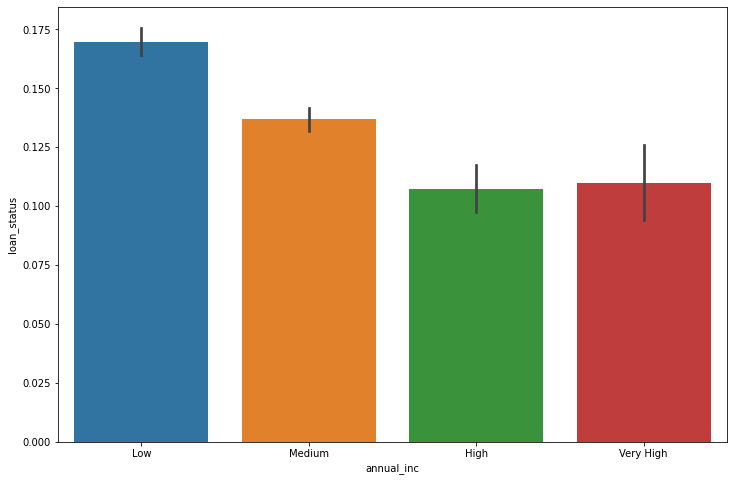

In [39]:
sns.barplot(x="annual_inc",y="loan_status",data=data)

In [40]:
new = []
for each_element in data.dti:
    if each_element <10:
        new.append('Low')
    elif each_element > 10  and  each_element <=20:
        new.append('Medium')
    else:
        new.append('High')

In [41]:
data['dti']=new

In [42]:
data.head(20)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,dti,mths_since_last_delinq,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0,1077501,1296599,Low,5000,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,Low,Verified,Dec-11,0,n,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,High,NaN,f,0.0,1,0,0.0,0,0.0,0.0
1,1,1077430,1314167,Low,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,Low,Source Verified,Dec-11,1,n,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,Low,NaN,f,0.0,1,0,0.0,0,0.0,0.0
2,2,1077175,1313524,Low,2400,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,Low,Not Verified,Dec-11,0,n,NaN,small_business,Low,NaN,f,0.0,1,0,0.0,0,0.0,0.0
3,3,1076863,1277178,Medium,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Low,Source Verified,Dec-11,0,n,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,Medium,35.0,f,0.0,1,0,0.0,0,0.0,0.0
4,5,1075269,1311441,Low,5000,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,Low,Source Verified,Dec-11,0,n,NaN,wedding,Medium,NaN,f,0.0,1,0,0.0,0,0.0,0.0
5,6,1069639,1304742,Medium,7000,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,Low,Not Verified,Dec-11,0,n,"Borrower added on 12/18/11 > I am planning on using the funds to pay off two retail credit cards with 24.99% interest rates, as well as a major bank credit card with a 18.99% rate. I pay all my bills on time, looking for a lower combined payment and lower monthly payment.<br>",debt_consolidation,High,NaN,f,0.0,1,0,0.0,0,0.0,0.0
6,7,1072053,1288686,Low,3000,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,Low,Source Verified,Dec-11,0,n,Borrower added on 12/16/11 > Downpayment for a car.<br>,car,Low,NaN,f,0.0,1,0,0.0,0,0.0,0.0
7,8,1071795,1306957,Medium,5600,5600.00000,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,Low,Source Verified,Dec-11,1,n,Borrower added on 12/21/11 > I own a small home-based judgment collection business. I have 5 years experience collecting debts. I am now going from a home office to a small office. I also plan to buy a small debt portfolio (eg. $10K for $1M of debt) <br>My score is not A+ because I own my home and have no mortgage.<br>,small_business,Low,NaN,f,0.0,1,0,0.0,0,0.0,0.0
8,9,1071570,1306721,Medium,5375,5350.00000,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,Low,Verified,Dec-11,1,n,"Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother and have no car payment or credit cards. I am in community college and work full time. Im going to use the money to make some repairs around the house and get some maintenance done on my car.<br><br> Borrower added on 12/20/11 > $1000 down only $4375 to go. Thanks to everyone that invested so far, looking forward to surprising my brother with the fixes around the house.<br>",other,Medium,NaN,f,0.0,1,0,0.0,0,0.0,0.0
9,10,1070078,1305201,Medium,6500,6500.00000,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5 years,OWN,Medium,Not 

<AxesSubplot:xlabel='dti', ylabel='loan_status'>

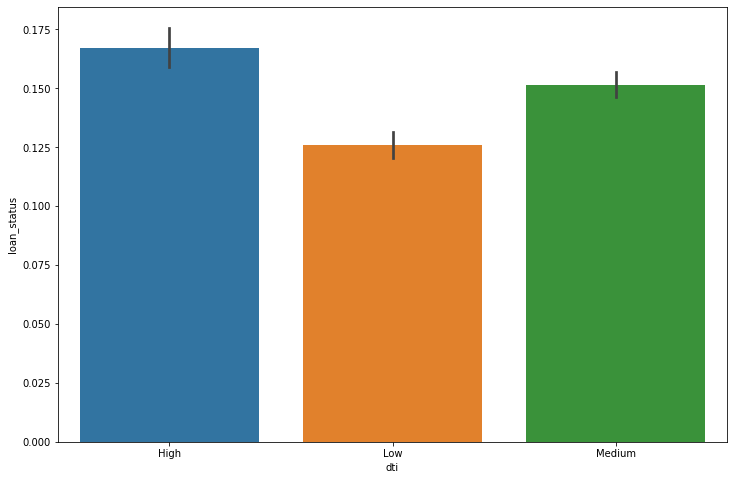

In [43]:
sns.barplot(x="dti",y="loan_status",data=data)

In [44]:
data['int_rate'] = list(map(lambda x: x[:-1], data['int_rate'].values))

In [45]:
data['int_rate'] = [float(x) for x in data['int_rate'].values]

In [46]:
new = []
for each_element in data.int_rate:
    if each_element < 10:
        new.append('Low')
    elif each_element > 10  and  each_element <=15:
        new.append('Medium')
    else:
        new.append('High')

In [47]:
data['int_rate']=new

In [48]:
data.head(20)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,dti,mths_since_last_delinq,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0,1077501,1296599,Low,5000,4975.00000,36 months,Medium,162.87,B,B2,NaN,10+ years,RENT,Low,Verified,Dec-11,0,n,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,High,NaN,f,0.0,1,0,0.0,0,0.0,0.0
1,1,1077430,1314167,Low,2500,2500.00000,60 months,High,59.83,C,C4,Ryder,< 1 year,RENT,Low,Source Verified,Dec-11,1,n,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,Low,NaN,f,0.0,1,0,0.0,0,0.0,0.0
2,2,1077175,1313524,Low,2400,2400.00000,36 months,High,84.33,C,C5,NaN,10+ years,RENT,Low,Not Verified,Dec-11,0,n,NaN,small_business,Low,NaN,f,0.0,1,0,0.0,0,0.0,0.0
3,3,1076863,1277178,Medium,10000,10000.00000,36 months,Medium,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Low,Source Verified,Dec-11,0,n,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,Medium,35.0,f,0.0,1,0,0.0,0,0.0,0.0
4,5,1075269,1311441,Low,5000,5000.00000,36 months,Low,156.46,A,A4,Veolia Transportaton,3 years,RENT,Low,Source Verified,Dec-11,0,n,NaN,wedding,Medium,NaN,f,0.0,1,0,0.0,0,0.0,0.0
5,6,1069639,1304742,Medium,7000,7000.00000,60 months,High,170.08,C,C5,Southern Star Photography,8 years,RENT,Low,Not Verified,Dec-11,0,n,"Borrower added on 12/18/11 > I am planning on using the funds to pay off two retail credit cards with 24.99% interest rates, as well as a major bank credit card with a 18.99% rate. I pay all my bills on time, looking for a lower combined payment and lower monthly payment.<br>",debt_consolidation,High,NaN,f,0.0,1,0,0.0,0,0.0,0.0
6,7,1072053,1288686,Low,3000,3000.00000,36 months,High,109.43,E,E1,MKC Accounting,9 years,RENT,Low,Source Verified,Dec-11,0,n,Borrower added on 12/16/11 > Downpayment for a car.<br>,car,Low,NaN,f,0.0,1,0,0.0,0,0.0,0.0
7,8,1071795,1306957,Medium,5600,5600.00000,60 months,High,152.39,F,F2,NaN,4 years,OWN,Low,Source Verified,Dec-11,1,n,Borrower added on 12/21/11 > I own a small home-based judgment collection business. I have 5 years experience collecting debts. I am now going from a home office to a small office. I also plan to buy a small debt portfolio (eg. $10K for $1M of debt) <br>My score is not A+ because I own my home and have no mortgage.<br>,small_business,Low,NaN,f,0.0,1,0,0.0,0,0.0,0.0
8,9,1071570,1306721,Medium,5375,5350.00000,60 months,Medium,121.45,B,B5,Starbucks,< 1 year,RENT,Low,Verified,Dec-11,1,n,"Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother and have no car payment or credit cards. I am in community college and work full time. Im going to use the money to make some repairs around the house and get some maintenance done on my car.<br><br> Borrower added on 12/20/11 > $1000 down only $4375 to go. Thanks to everyone that invested so far, looking forward to surprising my brother with the fixes around the house.<br>",other,Medium,NaN,f,0.0,1,0,0.0,0,0.0,0.0
9,10,1070078,1305201,Medium,6500,6500.00000,60 months,Medium,153.45,C,C3,Southwest Rural metro,5 years,OWN,Medium,Not Verified,Dec

<AxesSubplot:xlabel='int_rate', ylabel='loan_status'>

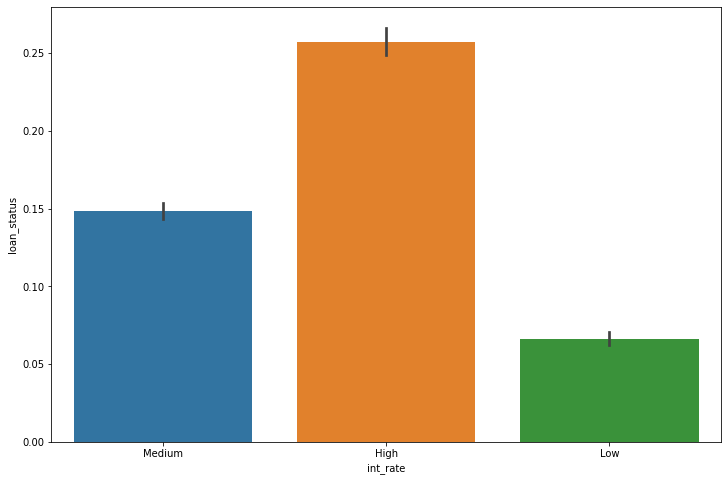

In [49]:
sns.barplot(x="int_rate",y="loan_status",data=data)

#QUESTION 4

SO in this we have given a confusion matrix for the model

So in this we have given a confusion matrix for 2nd model